[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Gt9RZOtY9KF0_IfokOjeyyCEZtBS5XpQ)

# Echoregions Regions2D Plotting Demonstration

This notebook demonstrates some of the functionalities of `echoregions` to read Echoview region `.evr` files and visualize regions.

In [3]:
# install echopype to read echousounder files
!pip install -q echopype==0.5.5

In [4]:
# install gdown to read data from Google Drive
!pip install gdown

In [5]:
import matplotlib.pyplot as plt
import xarray as xr
import os
from datetime import timedelta

In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
import echoregions as er

In [8]:
# download an example file
!wget https://raw.githubusercontent.com/OSOceanAcoustics/echoregions/main/echoregions/test_data/x1.evr -O x1.evr

--2022-12-11 19:36:24--  https://raw.githubusercontent.com/OSOceanAcoustics/echoregions/main/echoregions/test_data/x1.evr
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9349 (9.1K) [text/plain]
Saving to: ‘x1.evr’

x1.evr              100%[===================>]   9.13K  --.-KB/s    in 0.001s  

2022-12-11 19:36:24 (11.2 MB/s) - ‘x1.evr’ saved [9349/9349]



In [9]:
EVR_FILE = 'x1.evr'

### Get a Regions2D object with `read_evr`

In [10]:
r2d = er.read_evr(EVR_FILE)

/Users/valentina/anaconda/envs/echoregions/lib/python3.9/site-packages/echoregions/convert/evr_parser.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/Users/valentina/anaconda/envs/echoregions/lib/python3.9/site-packages/echoregions/convert/evr_parser.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/Users/valentina/anaconda/envs/echoregions/lib/python3.9/site-packages/echoregions/convert/evr_parser.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
/Users/valentina/anaconda/envs/echoregions/lib/python3.9/site-packages/echoregions/convert/evr_parser.py:113: FutureWarning: The frame.append method

## Plotting

In [11]:
# Display availible regions
print(r2d.data.region_id.values)

<IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35]
Length: 33, dtype: Int64


In [12]:
# let's select one id
region_id = 11

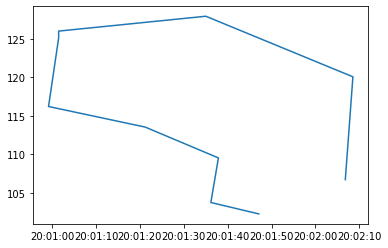

In [14]:
# Plot a region with a specific id with the `plot` function
r2d.plot(region_id)

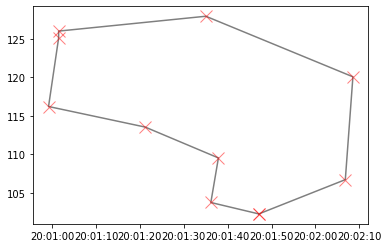

In [15]:
# Plot a closed region by using close_region=True.
# Optionally provide matplotlib kwargs for more customization.
r2d.plot(region_id, close_region=True, color='k', alpha=.5, marker='x', markeredgecolor='red', markersize=12)

## Plotting regions on an echogram

#### Reading Preprocessed Sonar Files

We have converted and calibrated a sample of echosounder files from the same transect and stored them in `.nc`. We can directly read them with the `xarray` library. 

In [16]:
# mounting the google drive (uncomment if you have permission to read directly from Google Drive)
# from google.colab import drive
# drive.mount('/content/drive/') 

In [17]:
# Paths for Google Drive read  (uncomment if you have permission to read directly from Google Drive)
# SONAR_PATH_Sv = '/content/drive/Shareddrives/uw-echospace/shared_data/SH1707/sample/Sv/'
# SONAR_PATH_raw = '/content/drive/Shareddrives/uw-echospace/shared_data/SH1707/sample/raw_converted/'

In [18]:
# install gdown to read data from Google Drive
!pip install gdown

In [19]:
# download a zipped sample folder from publicly available Google Drive
import gdown

url = 'https://drive.google.com/uc?id=1OhYVcakCEgXEKA4R9za4jvBWQUFIOnE5'
output = 'x1.tar.gz'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1OhYVcakCEgXEKA4R9za4jvBWQUFIOnE5
To: /Users/valentina/projects/uw-echospace/echoregions/notebooks/x1.tar.gz
100%|████████████████████████████████████████| 655M/655M [00:18<00:00, 35.7MB/s]


'x1.tar.gz'

In [21]:
# unzip into a sample folder
!tar -xvzf  x1.tar.gz

x x1.zarr/
x x1.zarr/equivalent_beam_angle/
x x1.zarr/equivalent_beam_angle/0
x x1.zarr/equivalent_beam_angle/.zattrs
x x1.zarr/equivalent_beam_angle/.zarray
x x1.zarr/ping_time/
x x1.zarr/ping_time/0
x x1.zarr/ping_time/8
x x1.zarr/ping_time/17
x x1.zarr/ping_time/22
x x1.zarr/ping_time/4
x x1.zarr/ping_time/13
x x1.zarr/ping_time/20
x x1.zarr/ping_time/2
x x1.zarr/ping_time/11
x x1.zarr/ping_time/19
x x1.zarr/ping_time/24
x x1.zarr/ping_time/.zattrs
x x1.zarr/ping_time/6
x x1.zarr/ping_time/15
x x1.zarr/ping_time/1
x x1.zarr/ping_time/10
x x1.zarr/ping_time/9
x x1.zarr/ping_time/18
x x1.zarr/ping_time/23
x x1.zarr/ping_time/5
x x1.zarr/ping_time/14
x x1.zarr/ping_time/21
x x1.zarr/ping_time/3
x x1.zarr/ping_time/12
x x1.zarr/ping_time/25
x x1.zarr/ping_time/.zarray
x x1.zarr/ping_time/7
x x1.zarr/ping_time/16
x x1.zarr/water_level/
x x1.zarr/water_level/0.20
x x1.zarr/water_level/0.11
x x1.zarr/water_level/0.2
x x1.zarr/water_level/0.19
x x1.zarr/water_level/0.24
x x1.zarr/water_leve

In [22]:
ds = xr.open_dataset("x1.zarr")

/Users/valentina/anaconda/envs/echoregions/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/Users/valentina/anaconda/envs/echoregions/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


The dataset has a `range_sample` dimension and instead we convert it to a `depth` dimension by adjusting the water level.

In [23]:
# create depth coordinate:
echo_range = ds.echo_range.isel(channel=0, ping_time=0)
# assuming water levels are same for different frequencies and location_time
depth = ds.water_level.isel(channel=0, ping_time=0) + echo_range
depth = depth.drop_vars('channel')
# creating a new depth dimension
ds['depth'] = depth
ds = ds.swap_dims({'range_sample': 'depth'})

In [24]:
ds.Sv

<xarray.DataArray 'Sv' (channel: 3, ping_time: 13192, depth: 3957)>
[156602232 values with dtype=float64]
Coordinates:
  * channel       (channel) object 'GPT  18 kHz 009072058c8d 1-1 ES18-11' ......
  * depth         (depth) float64 9.15 9.15 9.15 9.34 ... 758.1 758.3 758.5
  * ping_time     (ping_time) datetime64[ns] 2017-06-25T15:04:30.076000256 .....
    range_sample  (depth) int64 0 1 2 3 4 5 6 ... 3951 3952 3953 3954 3955 3956

#### Plotting

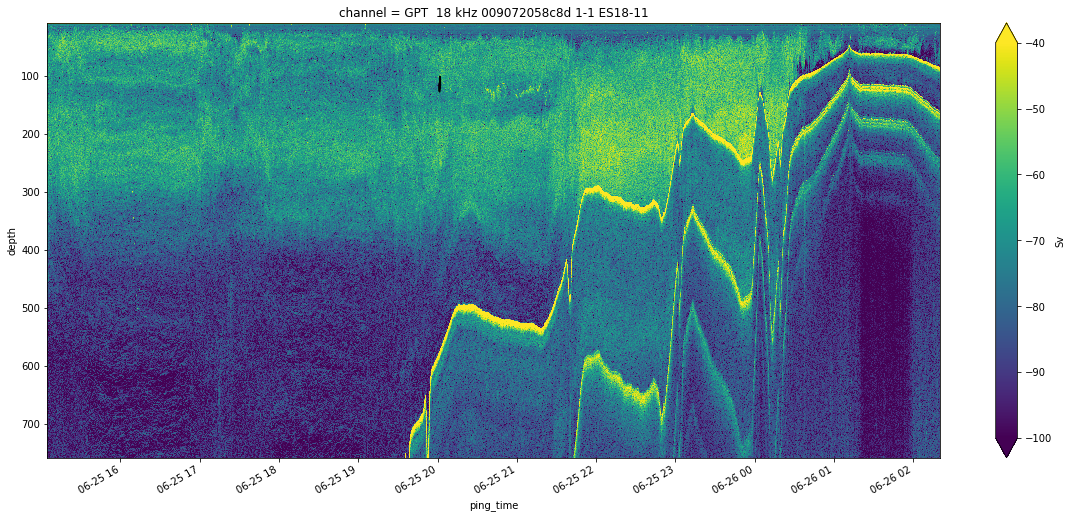

In [26]:
# plot Sv
ds.Sv.isel(channel=0).plot(x='ping_time', vmax=-40, vmin=-100, yincrease=False, figsize=(20,8))
# plot region
r2d.plot(region_id, close_region=True, color='k')
plt.show()

Let's limit the time extent of the echogram so that we can see better the region.

In [28]:
# we will create a 15 minute window around the bounding box of the region
bbox_right = r2d.data[r2d.data.region_id==region_id].region_bbox_right.iloc[0] + timedelta(minutes = 15)
bbox_left = r2d.data[r2d.data.region_id==region_id].region_bbox_left.iloc[0] - timedelta(minutes = 15)

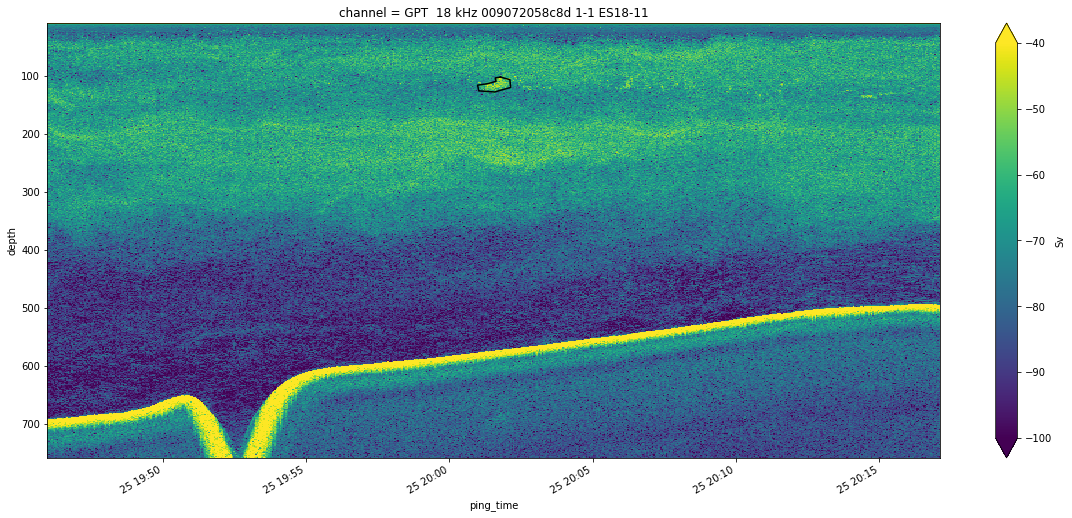

In [30]:
# plot Sv
ds.Sv.isel(channel=0).sel(ping_time=slice(bbox_left, bbox_right)).plot(x='ping_time', vmax=-40, vmin=-100, yincrease=False, figsize=(20,8))
# plot region
r2d.plot(region_id, close_region=True, color='k')
plt.show()